In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([[
    hub.KerasLayer(handle=url, input_shape=(224, 224, 3), trainable=False)
]])

model.summary()

TypeError: The added layer must be an instance of class Layer. Found: [<tensorflow_hub.keras_layer.KerasLayer object at 0x7fca0d06ee80>]

In [3]:
import pathlib
import os

data_root = pathlib.Path('./datasets/imagenetv2-top-images-format-val')
print(data_root)

datasets/imagenetv2-top-images-format-val


In [4]:
for idx, item in enumerate(data_root.iterdir()):
    print(item)
    if idx == 9:
        break

datasets/imagenetv2-top-images-format-val/797
datasets/imagenetv2-top-images-format-val/909
datasets/imagenetv2-top-images-format-val/135
datasets/imagenetv2-top-images-format-val/307
datasets/imagenetv2-top-images-format-val/763
datasets/imagenetv2-top-images-format-val/551
datasets/imagenetv2-top-images-format-val/61
datasets/imagenetv2-top-images-format-val/95
datasets/imagenetv2-top-images-format-val/338
datasets/imagenetv2-top-images-format-val/936


In [5]:
label_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
label_file = tf.keras.utils.get_file('label', label_url)
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

16384/10484 [==============================================] - 0s 0us/step
1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


In [6]:
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

image_count: 10000


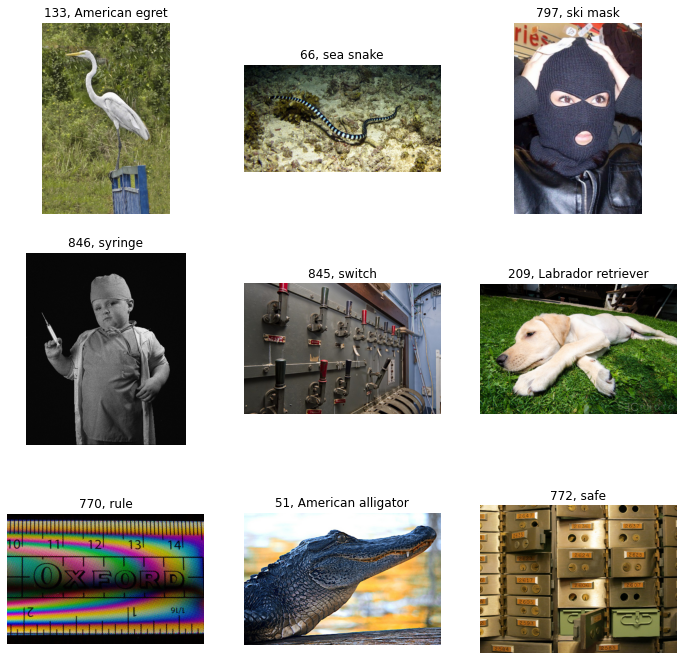

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
for c in range(9):
    image_path = random.choice(all_image_paths)
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
plt.show()

[400 571 502 679 797]
571
Anser is correct !!
Predicted Answer is  gasmask


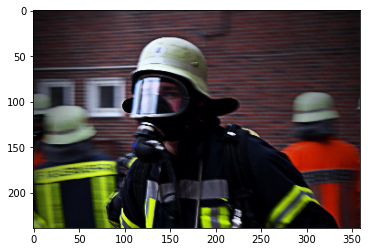

In [8]:
import cv2

img = random.choice(all_image_paths)
label = int(img.split('/')[-2])+1
img_draw = cv2.imread(img)
img_resized = cv2.resize(img_draw, dsize=(224, 224))
img_resized = img_resized / 255.0
img_resized = np.expand_dims(img_resized, axis=0)
top_5_predict = model.predict(img_resized)[0].argsort()[::-1][:5]
print(top_5_predict)
print(label)
if label in top_5_predict:
    print('Anser is correct !!')
print('Predicted Answer is ', label_text[label])

plt.imshow(plt.imread(img));

In [9]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

logits = model.predict(img_resized)[0]
prediction = softmax(logits)

top_5_predict = prediction.argsort()[::-1][:5]
labels = [label_text[index] for index in top_5_predict]

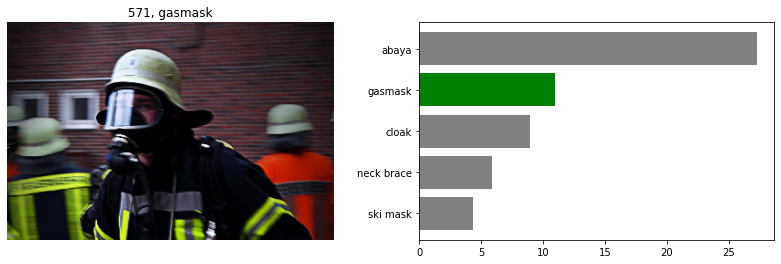

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.imshow(plt.imread(img))
idx = int(img.split('/')[-2]) + 1
plt.title(str(idx) + ', ' + label_text[idx])
plt.axis('off')

plt.subplot(1,2,2)
color = ['grey'] * 5
if idx in top_5_predict:
    color[top_5_predict.tolist().index(idx)] = 'green'
color = color[::-1]
plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
plt.yticks(range(5), labels[::-1])

plt.show()

In [12]:
# 전이학습

In [ ]:
import pandas as pd
label_text = pd.read_csv('')
print(lable_text.head())

In [ ]:
label_text.info()

In [ ]:
label_text[''].nunique()

In [ ]:
plt.figure(figsize=(12,8))
for c in range(6):
    image_id = label_text.loc[c, 'id']
    plt.subplot(2,3,c+1)
    plt.imshow(plt.imread('' + image_id + '.jpg'))
    plt.title(str(c) + ', ' + label_text.loc[c, ''])
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

In [ ]:
for layer in model.layers[:-20]:
    layer.trainabel = False
for layer in model.layers[-20:]:
    layer.trainable = True
    
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
train_X = []
for i in range(len(label_text)):
    img = cv2.imread('' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    train_X.append(img)
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, 'bytes')

In [ ]:
unique_Y = label_text[''].unique().tolist()
train_Y = [unique_Y.index() for in label_text['']]
train_Y = np.array(train_Y)

print(train_Y[:10])
print(train_Y[-10:])

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()